## **Task 3: Heart Disease Prediction**

❤️ HEART DISEASE PREDICTION WITH MACHINE LEARNING

🔍 SECTION 1: DATA LOADING AND INITIAL INSPECTION
--------------------------------------------------
📁 Loading Heart Disease Dataset...
💡 Note: Make sure to upload the 'heart.csv' file or use the provided sample data
📝 Creating sample heart disease dataset for demonstration...
✅ Sample dataset created successfully

📏 Dataset Shape: (1000, 14)
📋 Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

📖 Feature Descriptions:
   • age: Age in years
   • sex: Sex (1 = male; 0 = female)
   • cp: Chest pain type (0-3)
   • trestbps: Resting blood pressure (mm Hg)
   • chol: Serum cholesterol (mg/dl)
   • fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
   • restecg: Resting electrocardiographic results (0-2)
   • thalach: Maximum heart rate achieved
   • exang: Exercise induced angina (1 = yes; 0 = no)
   • oldpeak: ST depression induced by exercise
   • sl

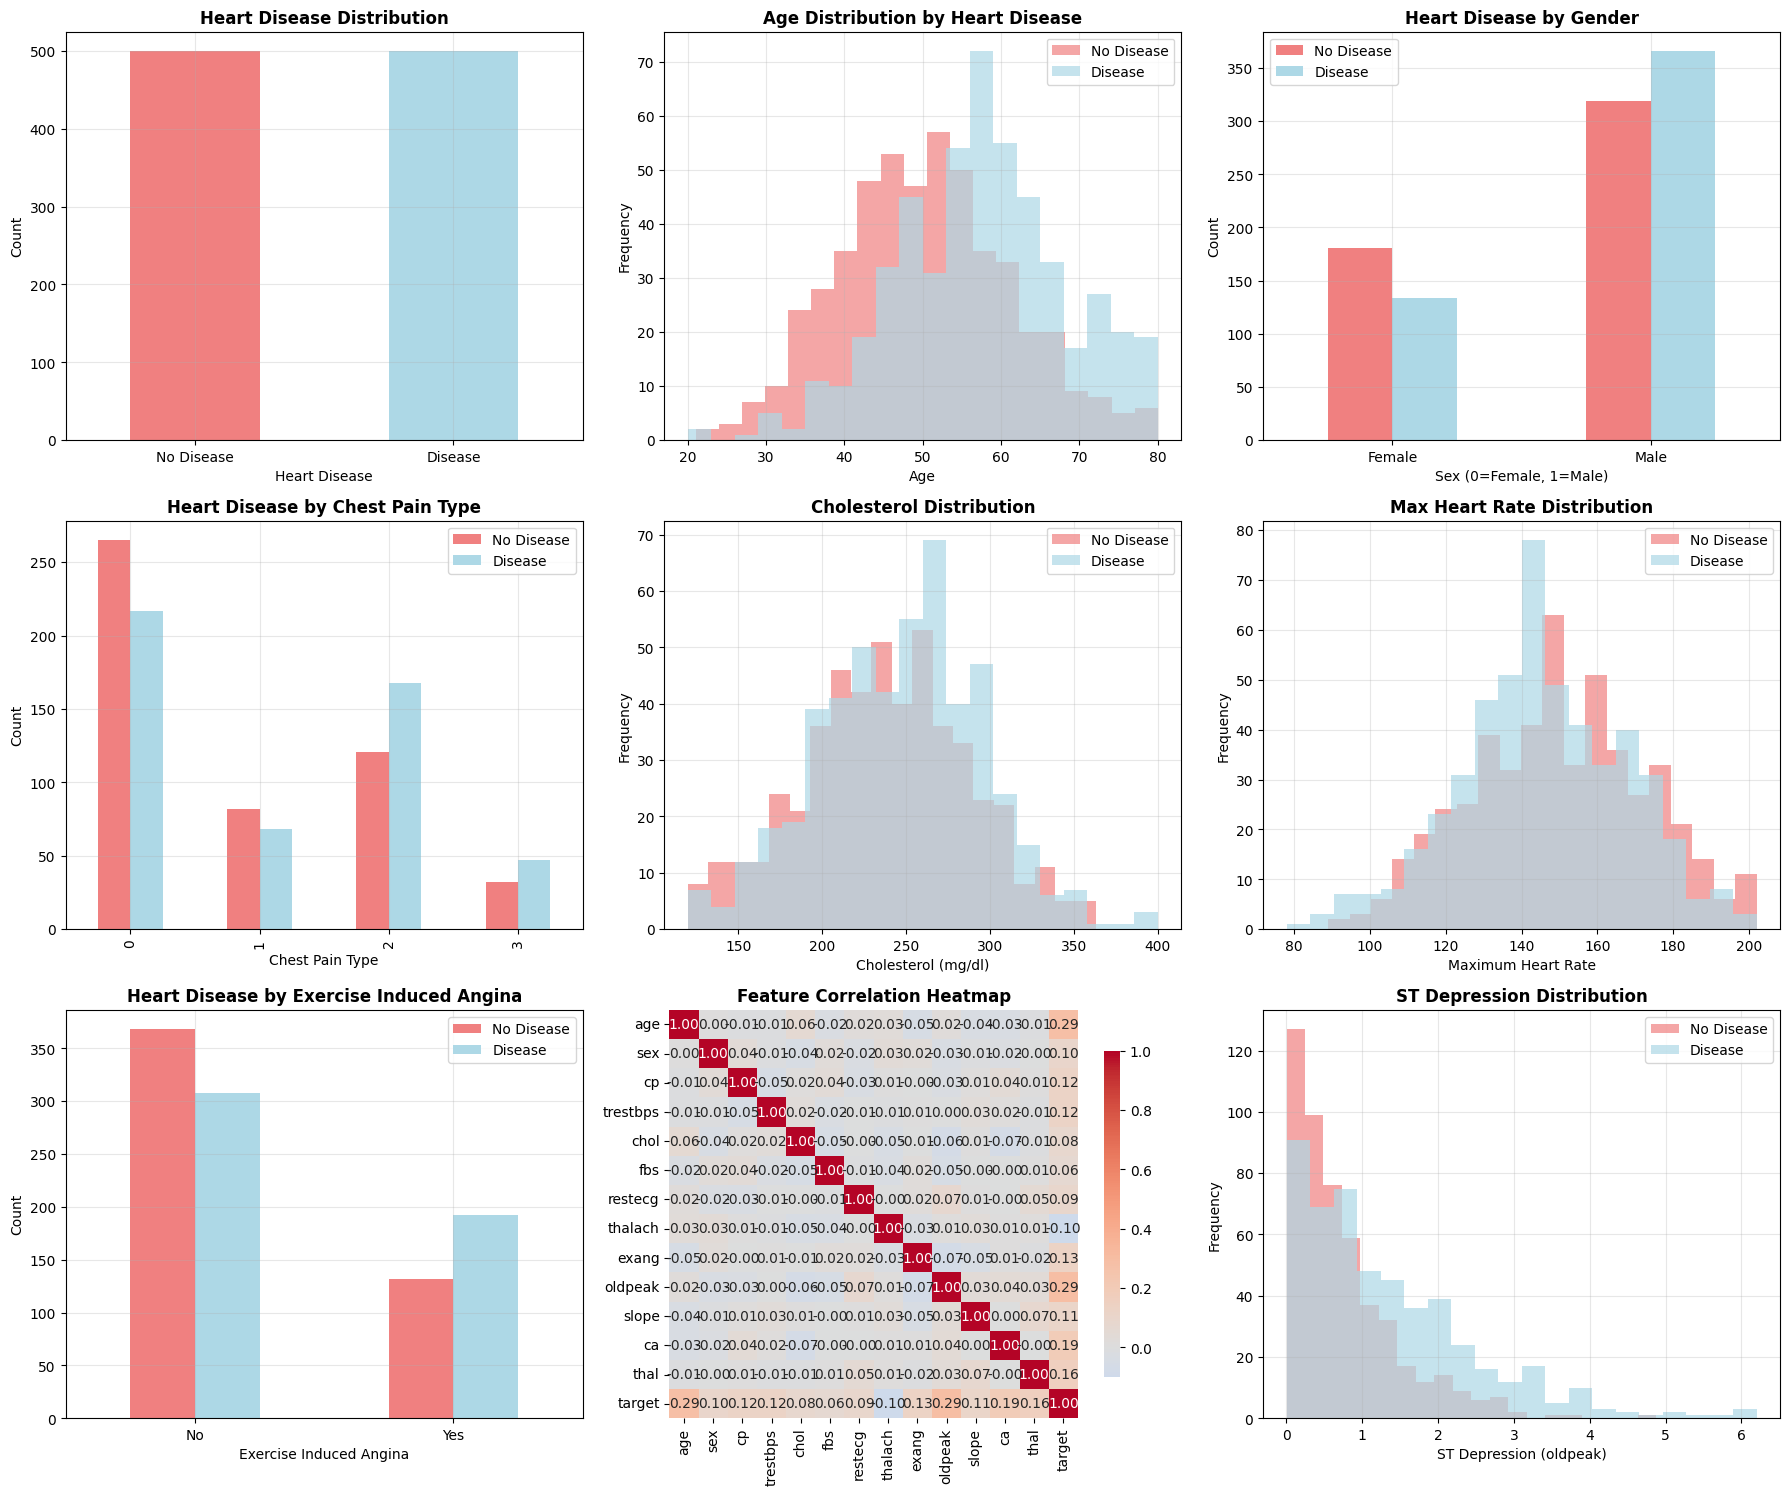

📦 Creating box plots for continuous variables...


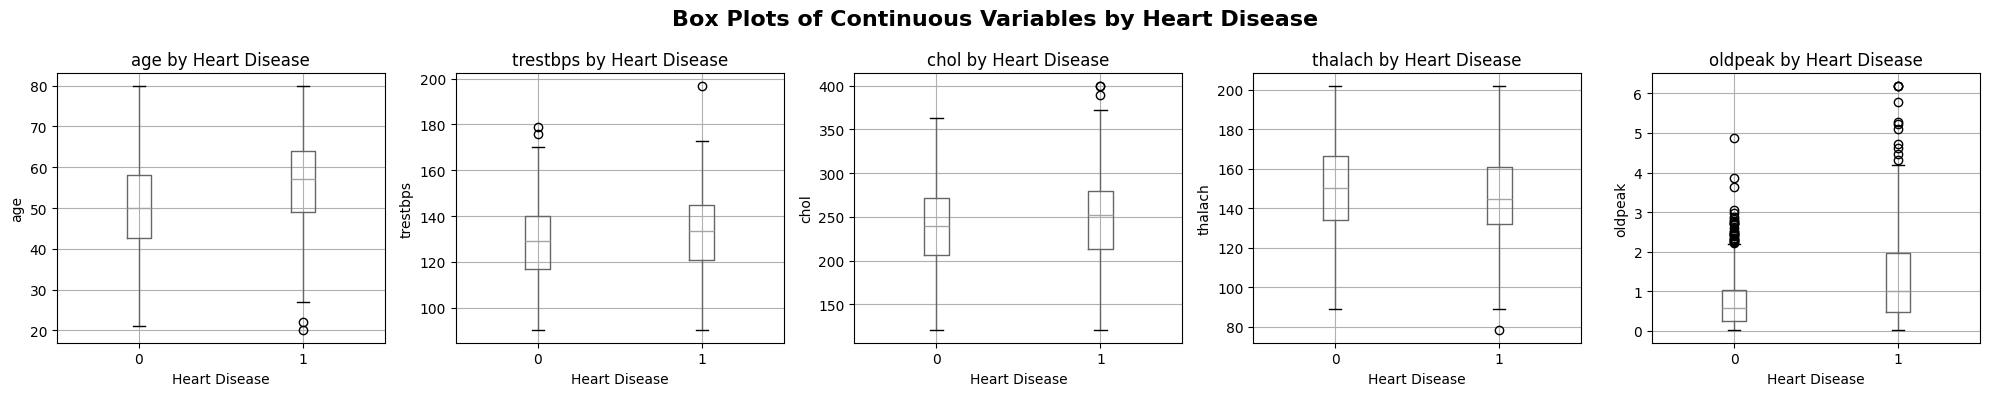


🛠️ SECTION 4: FEATURE ANALYSIS AND PREPARATION
---------------------------------------------
📊 Features shape: (1000, 13)
🎯 Target shape: (1000,)

🔗 Feature Correlation with Target:
oldpeak     0.291203
age         0.289720
ca          0.188528
thal        0.161645
exang       0.128205
trestbps    0.120802
cp          0.119961
slope       0.105388
thalach    -0.101573
sex         0.101181
restecg     0.093008
chol        0.084512
fbs         0.064591
Name: target, dtype: float64

🔍 Top 5 features most correlated with heart disease:
   • oldpeak: 0.291
   • age: 0.290
   • ca: 0.189
   • thal: 0.162
   • exang: 0.128

📊 Data Split:
   • Training set: 800 samples
   • Test set: 200 samples
   • Training target distribution: [400, 400]
   • Test target distribution: [100, 100]
✅ Features scaled using StandardScaler

🤖 SECTION 5: MODEL TRAINING AND EVALUATION
---------------------------------------------
🔄 Training and evaluating models...

📊 Training Logistic Regression...
   📈 Accuracy:

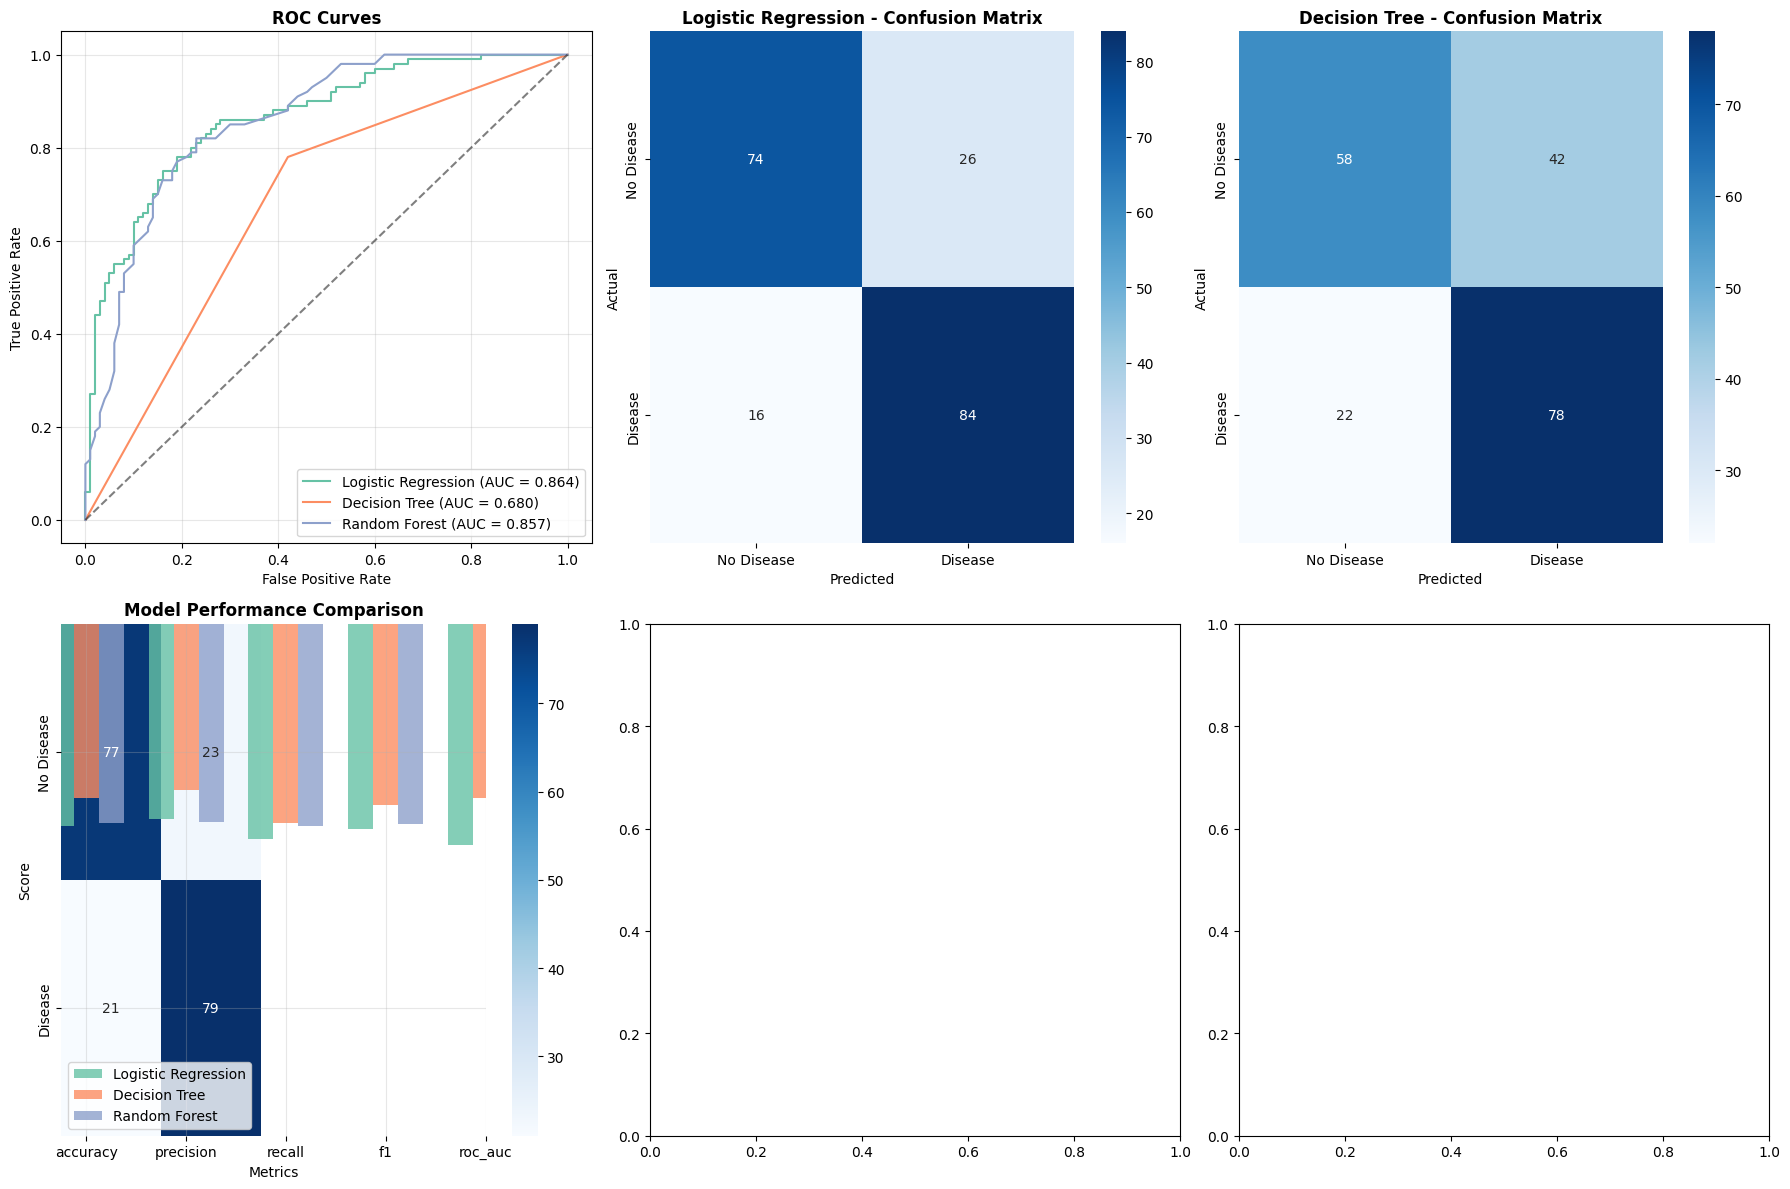


🔍 SECTION 7: FEATURE IMPORTANCE ANALYSIS
---------------------------------------------

📊 Decision Tree - Top 10 Important Features:
     feature  importance
9    oldpeak    0.199652
0        age    0.189590
7    thalach    0.139456
4       chol    0.119047
3   trestbps    0.118481
1        sex    0.046926
11        ca    0.046047
2         cp    0.032171
12      thal    0.027797
5        fbs    0.023753

📊 Random Forest - Top 10 Important Features:
     feature  importance
9    oldpeak    0.187540
0        age    0.170436
7    thalach    0.124429
4       chol    0.119634
3   trestbps    0.117980
11        ca    0.056749
12      thal    0.044781
2         cp    0.044443
10     slope    0.034348
8      exang    0.027823


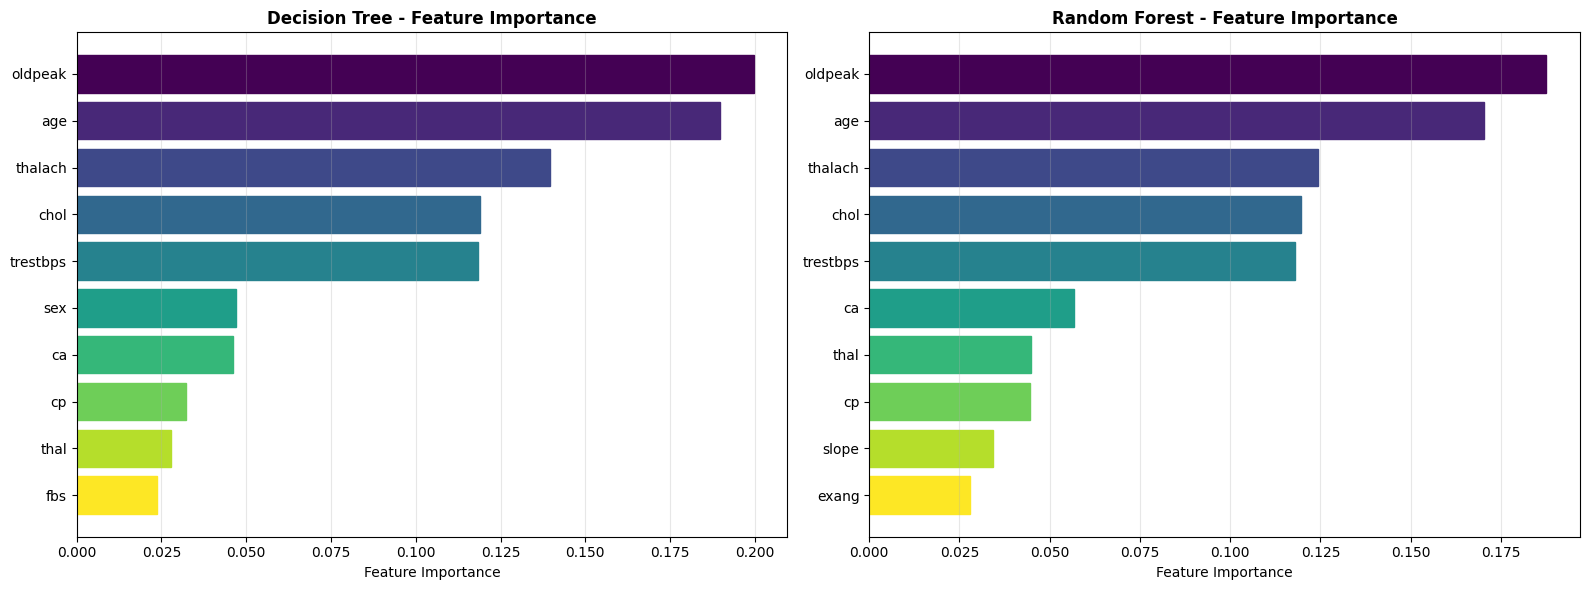


📊 Logistic Regression - Feature Coefficients:
     feature  coefficient
9    oldpeak     0.930645
0        age     0.866139
11        ca     0.619743
8      exang     0.477462
12      thal     0.408022
2         cp     0.342770
3   trestbps     0.330611
1        sex     0.329798
7    thalach    -0.292849
10     slope     0.292223
5        fbs     0.270555
4       chol     0.238109
6    restecg     0.216769


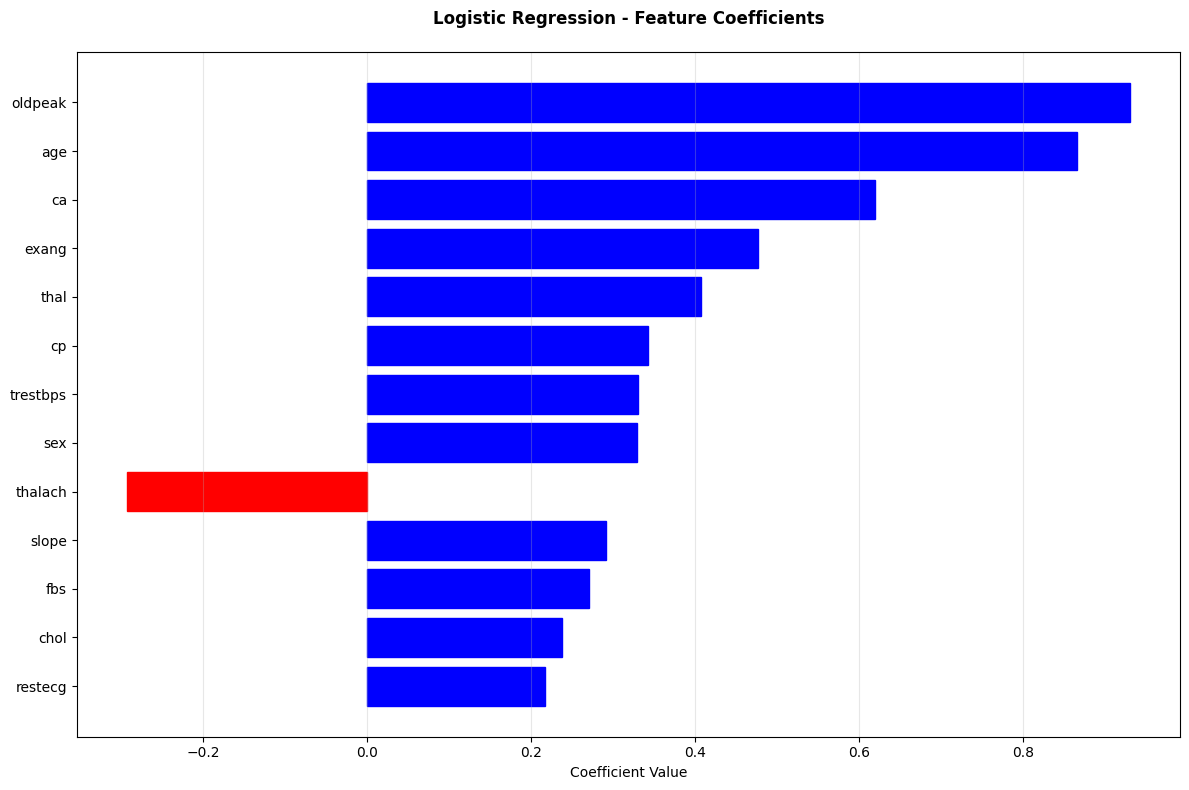


📈 SECTION 8: MODEL COMPARISON AND INSIGHTS
---------------------------------------------
📊 MODEL COMPARISON:
              Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC  CV Accuracy
Logistic Regression      0.79     0.7636    0.84    0.8000   0.8639       0.7500
      Decision Tree      0.68     0.6500    0.78    0.7091   0.6800       0.6225
      Random Forest      0.78     0.7745    0.79    0.7822   0.8571       0.7025

🏆 Best Performing Model: Logistic Regression
   📈 ROC-AUC: 0.8639
   🎯 Accuracy: 0.7900
   📊 F1-Score: 0.8000

💡 MEDICAL INSIGHTS:
   🔍 Key Risk Factors (based on feature importance):

📊 Model Performance Summary:
   • The model correctly identifies 84.0% of actual heart disease cases
   • When the model predicts heart disease, it's correct 76.4% of the time
   • Overall accuracy is 79.0%

⚠️  IMPORTANT MEDICAL DISCLAIMER:
   This model is for educational purposes only and should NOT be used for
   actual medical diagnosis. Always consult qualified healthcare

In [1]:
# Task 3: Heart Disease Prediction
# A comprehensive guide for medical data classification using machine learning

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           roc_auc_score, roc_curve, confusion_matrix, classification_report)
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("Set2")

print("❤️ HEART DISEASE PREDICTION WITH MACHINE LEARNING")
print("=" * 55)

# ============================================================================
# SECTION 1: DATA LOADING AND INITIAL INSPECTION
# ============================================================================

print("\n🔍 SECTION 1: DATA LOADING AND INITIAL INSPECTION")
print("-" * 50)

# Note: For Google Colab, you'll need to upload the dataset or use a direct URL
# Here's how to load the dataset in different ways:

print("📁 Loading Heart Disease Dataset...")
print("💡 Note: Make sure to upload the 'heart.csv' file or use the provided sample data")

# Method 1: If you have the file uploaded to Colab
try:
    # Try to load from uploaded file
    df = pd.read_csv('heart.csv')
    print("✅ Dataset loaded from uploaded file")
except FileNotFoundError:
    # Method 2: Create sample data for demonstration
    print("📝 Creating sample heart disease dataset for demonstration...")

    # Generate realistic heart disease dataset
    np.random.seed(42)
    n_samples = 1000

    # Generate features
    age = np.random.normal(54, 12, n_samples).astype(int)
    age = np.clip(age, 20, 80)

    sex = np.random.choice([0, 1], n_samples, p=[0.32, 0.68])  # 0=female, 1=male
    cp = np.random.choice([0, 1, 2, 3], n_samples, p=[0.47, 0.16, 0.29, 0.08])
    trestbps = np.random.normal(131, 17, n_samples).astype(int)
    trestbps = np.clip(trestbps, 90, 200)

    chol = np.random.normal(246, 51, n_samples).astype(int)
    chol = np.clip(chol, 120, 400)

    fbs = np.random.choice([0, 1], n_samples, p=[0.85, 0.15])
    restecg = np.random.choice([0, 1, 2], n_samples, p=[0.48, 0.50, 0.02])

    thalach = np.random.normal(149, 22, n_samples).astype(int)
    thalach = np.clip(thalach, 70, 202)

    exang = np.random.choice([0, 1], n_samples, p=[0.68, 0.32])
    oldpeak = np.random.exponential(1.04, n_samples)
    oldpeak = np.clip(oldpeak, 0, 6.2)

    slope = np.random.choice([0, 1, 2], n_samples, p=[0.21, 0.14, 0.65])
    ca = np.random.choice([0, 1, 2, 3, 4], n_samples, p=[0.59, 0.25, 0.12, 0.03, 0.01])
    thal = np.random.choice([0, 1, 2, 3], n_samples, p=[0.02, 0.18, 0.17, 0.63])

    # Generate target based on features (with some realistic correlations)
    risk_score = (
        0.05 * age +
        0.5 * sex +
        0.3 * cp +
        0.01 * trestbps +
        0.002 * chol +
        0.3 * fbs +
        0.2 * restecg +
        -0.01 * thalach +
        0.8 * exang +
        0.5 * oldpeak +
        0.3 * slope +
        0.4 * ca +
        0.3 * thal +
        np.random.normal(0, 1, n_samples)
    )

    target = (risk_score > np.median(risk_score)).astype(int)

    # Create DataFrame
    df = pd.DataFrame({
        'age': age,
        'sex': sex,
        'cp': cp,
        'trestbps': trestbps,
        'chol': chol,
        'fbs': fbs,
        'restecg': restecg,
        'thalach': thalach,
        'exang': exang,
        'oldpeak': oldpeak,
        'slope': slope,
        'ca': ca,
        'thal': thal,
        'target': target
    })

    print("✅ Sample dataset created successfully")

# Display basic information about the dataset
print(f"\n📏 Dataset Shape: {df.shape}")
print(f"📋 Columns: {list(df.columns)}")

# Column descriptions for understanding
column_descriptions = {
    'age': 'Age in years',
    'sex': 'Sex (1 = male; 0 = female)',
    'cp': 'Chest pain type (0-3)',
    'trestbps': 'Resting blood pressure (mm Hg)',
    'chol': 'Serum cholesterol (mg/dl)',
    'fbs': 'Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)',
    'restecg': 'Resting electrocardiographic results (0-2)',
    'thalach': 'Maximum heart rate achieved',
    'exang': 'Exercise induced angina (1 = yes; 0 = no)',
    'oldpeak': 'ST depression induced by exercise',
    'slope': 'Slope of peak exercise ST segment (0-2)',
    'ca': 'Number of major vessels colored by fluoroscopy (0-4)',
    'thal': 'Thalassemia (0-3)',
    'target': 'Heart disease (1 = disease; 0 = no disease)'
}

print(f"\n📖 Feature Descriptions:")
for col, desc in column_descriptions.items():
    print(f"   • {col}: {desc}")

# Display first few rows
print(f"\n📄 First 5 rows:")
print(df.head())

# Display last few rows
print(f"\n📄 Last 5 rows:")
print(df.tail())

# ============================================================================
# SECTION 2: DATA CLEANING AND PREPROCESSING
# ============================================================================

print("\n🧹 SECTION 2: DATA CLEANING AND PREPROCESSING")
print("-" * 45)

# Check for missing values
print("❓ Checking for missing values...")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("✅ No missing values found!")
else:
    print(f"⚠️ Found {missing_values.sum()} missing values")
    # Handle missing values if any
    df = df.dropna()
    print(f"🗑️ Removed rows with missing values. New shape: {df.shape}")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n🔄 Duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"🗑️ Removed {duplicates} duplicate rows. New shape: {df.shape}")

# Data types
print(f"\n📊 Data Types:")
print(df.dtypes)

# Basic statistics
print(f"\n📈 Basic Statistics:")
print(df.describe())

# Check target distribution
print(f"\n🎯 Target Distribution:")
target_counts = df['target'].value_counts()
print(target_counts)
print(f"   • No Disease (0): {target_counts[0]} ({target_counts[0]/len(df)*100:.1f}%)")
print(f"   • Disease (1): {target_counts[1]} ({target_counts[1]/len(df)*100:.1f}%)")

# Check for class imbalance
balance_ratio = min(target_counts) / max(target_counts)
print(f"   • Balance Ratio: {balance_ratio:.2f}")
if balance_ratio < 0.7:
    print("   ⚠️ Dataset is imbalanced - consider using stratified sampling")
else:
    print("   ✅ Dataset is reasonably balanced")

# ============================================================================
# SECTION 3: EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================

print("\n🔍 SECTION 3: EXPLORATORY DATA ANALYSIS (EDA)")
print("-" * 45)

# Set up the plotting area
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

print("📊 Creating comprehensive EDA visualizations...")

# 1. Target distribution
ax = axes[0]
target_counts.plot(kind='bar', ax=ax, color=['lightcoral', 'lightblue'])
ax.set_title('Heart Disease Distribution', fontweight='bold')
ax.set_xlabel('Heart Disease')
ax.set_ylabel('Count')
ax.set_xticklabels(['No Disease', 'Disease'], rotation=0)
ax.grid(True, alpha=0.3)

# 2. Age distribution by target
ax = axes[1]
df[df['target']==0]['age'].hist(ax=ax, alpha=0.7, label='No Disease', bins=20, color='lightcoral')
df[df['target']==1]['age'].hist(ax=ax, alpha=0.7, label='Disease', bins=20, color='lightblue')
ax.set_title('Age Distribution by Heart Disease', fontweight='bold')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid(True, alpha=0.3)

# 3. Sex vs Heart Disease
ax = axes[2]
sex_target = pd.crosstab(df['sex'], df['target'])
sex_target.plot(kind='bar', ax=ax, color=['lightcoral', 'lightblue'])
ax.set_title('Heart Disease by Gender', fontweight='bold')
ax.set_xlabel('Sex (0=Female, 1=Male)')
ax.set_ylabel('Count')
ax.set_xticklabels(['Female', 'Male'], rotation=0)
ax.legend(['No Disease', 'Disease'])
ax.grid(True, alpha=0.3)

# 4. Chest pain type vs Heart Disease
ax = axes[3]
cp_target = pd.crosstab(df['cp'], df['target'])
cp_target.plot(kind='bar', ax=ax, color=['lightcoral', 'lightblue'])
ax.set_title('Heart Disease by Chest Pain Type', fontweight='bold')
ax.set_xlabel('Chest Pain Type')
ax.set_ylabel('Count')
ax.legend(['No Disease', 'Disease'])
ax.grid(True, alpha=0.3)

# 5. Cholesterol distribution
ax = axes[4]
df[df['target']==0]['chol'].hist(ax=ax, alpha=0.7, label='No Disease', bins=20, color='lightcoral')
df[df['target']==1]['chol'].hist(ax=ax, alpha=0.7, label='Disease', bins=20, color='lightblue')
ax.set_title('Cholesterol Distribution', fontweight='bold')
ax.set_xlabel('Cholesterol (mg/dl)')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid(True, alpha=0.3)

# 6. Maximum heart rate distribution
ax = axes[5]
df[df['target']==0]['thalach'].hist(ax=ax, alpha=0.7, label='No Disease', bins=20, color='lightcoral')
df[df['target']==1]['thalach'].hist(ax=ax, alpha=0.7, label='Disease', bins=20, color='lightblue')
ax.set_title('Max Heart Rate Distribution', fontweight='bold')
ax.set_xlabel('Maximum Heart Rate')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid(True, alpha=0.3)

# 7. Exercise induced angina
ax = axes[6]
exang_target = pd.crosstab(df['exang'], df['target'])
exang_target.plot(kind='bar', ax=ax, color=['lightcoral', 'lightblue'])
ax.set_title('Heart Disease by Exercise Induced Angina', fontweight='bold')
ax.set_xlabel('Exercise Induced Angina')
ax.set_ylabel('Count')
ax.set_xticklabels(['No', 'Yes'], rotation=0)
ax.legend(['No Disease', 'Disease'])
ax.grid(True, alpha=0.3)

# 8. Correlation heatmap
ax = axes[7]
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
           square=True, fmt='.2f', ax=ax, cbar_kws={'shrink': 0.8})
ax.set_title('Feature Correlation Heatmap', fontweight='bold')

# 9. Oldpeak (ST depression) distribution
ax = axes[8]
df[df['target']==0]['oldpeak'].hist(ax=ax, alpha=0.7, label='No Disease', bins=20, color='lightcoral')
df[df['target']==1]['oldpeak'].hist(ax=ax, alpha=0.7, label='Disease', bins=20, color='lightblue')
ax.set_title('ST Depression Distribution', fontweight='bold')
ax.set_xlabel('ST Depression (oldpeak)')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional box plots for continuous variables
print("📦 Creating box plots for continuous variables...")
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig, axes = plt.subplots(1, len(continuous_vars), figsize=(20, 4))

for i, var in enumerate(continuous_vars):
    df.boxplot(column=var, by='target', ax=axes[i])
    axes[i].set_title(f'{var} by Heart Disease')
    axes[i].set_xlabel('Heart Disease')
    axes[i].set_ylabel(var)

plt.suptitle('Box Plots of Continuous Variables by Heart Disease', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# SECTION 4: FEATURE ANALYSIS AND PREPARATION
# ============================================================================

print("\n🛠️ SECTION 4: FEATURE ANALYSIS AND PREPARATION")
print("-" * 45)

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

print(f"📊 Features shape: {X.shape}")
print(f"🎯 Target shape: {y.shape}")

# Feature correlation with target
print("\n🔗 Feature Correlation with Target:")
feature_target_corr = df.corr()['target'].drop('target').sort_values(key=abs, ascending=False)
print(feature_target_corr)

# Identify highly correlated features
print(f"\n🔍 Top 5 features most correlated with heart disease:")
top_features = feature_target_corr.head(5)
for feature, corr in top_features.items():
    print(f"   • {feature}: {corr:.3f}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📊 Data Split:")
print(f"   • Training set: {X_train.shape[0]} samples")
print(f"   • Test set: {X_test.shape[0]} samples")
print(f"   • Training target distribution: {y_train.value_counts().tolist()}")
print(f"   • Test target distribution: {y_test.value_counts().tolist()}")

# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled using StandardScaler")

# ============================================================================
# SECTION 5: MODEL TRAINING AND EVALUATION
# ============================================================================

print("\n🤖 SECTION 5: MODEL TRAINING AND EVALUATION")
print("-" * 45)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

# Store results
results = {}

print("🔄 Training and evaluating models...")

for name, model in models.items():
    print(f"\n📊 Training {name}...")

    # Train model
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled if name == 'Logistic Regression' else X_train,
                               y_train, cv=5, scoring='accuracy')

    results[name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }

    print(f"   📈 Accuracy: {accuracy:.4f}")
    print(f"   🎯 Precision: {precision:.4f}")
    print(f"   🔍 Recall: {recall:.4f}")
    print(f"   📊 F1-Score: {f1:.4f}")
    print(f"   📈 ROC-AUC: {roc_auc:.4f}")
    print(f"   🔄 CV Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# ============================================================================
# SECTION 6: MODEL EVALUATION VISUALIZATIONS
# ============================================================================

print("\n📊 SECTION 6: MODEL EVALUATION VISUALIZATIONS")
print("-" * 45)

# Create evaluation plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# ROC Curves
ax = axes[0, 0]
for name in models.keys():
    fpr, tpr, _ = roc_curve(y_test, results[name]['probabilities'])
    ax.plot(fpr, tpr, label=f"{name} (AUC = {results[name]['roc_auc']:.3f})")

ax.plot([0, 1], [0, 1], 'k--', alpha=0.5)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Confusion Matrices
for i, name in enumerate(models.keys()):
    ax = axes[0, i+1] if i < 2 else axes[1, i-2]
    cm = confusion_matrix(y_test, results[name]['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    ax.set_title(f'{name} - Confusion Matrix', fontweight='bold')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

# Model Comparison
ax = axes[1, 0]
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
x = np.arange(len(metrics))
width = 0.25

for i, name in enumerate(models.keys()):
    values = [results[name][metric] for metric in metrics]
    ax.bar(x + i*width, values, width, label=name, alpha=0.8)

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison', fontweight='bold')
ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# SECTION 7: FEATURE IMPORTANCE ANALYSIS
# ============================================================================

print("\n🔍 SECTION 7: FEATURE IMPORTANCE ANALYSIS")
print("-" * 45)

# Feature importance from tree-based models
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

tree_models = ['Decision Tree', 'Random Forest']
for i, model_name in enumerate(tree_models):
    model = results[model_name]['model']
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    print(f"\n📊 {model_name} - Top 10 Important Features:")
    print(feature_importance.head(10))

    # Plot feature importance
    ax = axes[i]
    top_features = feature_importance.head(10)
    bars = ax.barh(range(len(top_features)), top_features['importance'])
    ax.set_yticks(range(len(top_features)))
    ax.set_yticklabels(top_features['feature'])
    ax.set_xlabel('Feature Importance')
    ax.set_title(f'{model_name} - Feature Importance', fontweight='bold')
    ax.invert_yaxis()

    # Color bars
    colors = plt.cm.viridis(np.linspace(0, 1, len(bars)))
    for bar, color in zip(bars, colors):
        bar.set_color(color)

    ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Logistic Regression coefficients
print(f"\n📊 Logistic Regression - Feature Coefficients:")
lr_model = results['Logistic Regression']['model']
feature_coef = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lr_model.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)

print(feature_coef)

# Plot logistic regression coefficients
plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(feature_coef)), feature_coef['coefficient'])
plt.yticks(range(len(feature_coef)), feature_coef['feature'])
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression - Feature Coefficients', fontweight='bold', pad=20)
plt.gca().invert_yaxis()

# Color bars based on positive/negative coefficients
colors = ['red' if x < 0 else 'blue' for x in feature_coef['coefficient']]
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# ============================================================================
# SECTION 8: MODEL COMPARISON AND INSIGHTS
# ============================================================================

print("\n📈 SECTION 8: MODEL COMPARISON AND INSIGHTS")
print("-" * 45)

# Create comparison table
comparison_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Accuracy': [results[name]['accuracy'] for name in models.keys()],
    'Precision': [results[name]['precision'] for name in models.keys()],
    'Recall': [results[name]['recall'] for name in models.keys()],
    'F1-Score': [results[name]['f1'] for name in models.keys()],
    'ROC-AUC': [results[name]['roc_auc'] for name in models.keys()],
    'CV Accuracy': [results[name]['cv_mean'] for name in models.keys()]
}).round(4)

print("📊 MODEL COMPARISON:")
print(comparison_df.to_string(index=False))

# Determine best model
best_model_name = max(results.keys(), key=lambda x: results[x]['roc_auc'])
best_model = results[best_model_name]

print(f"\n🏆 Best Performing Model: {best_model_name}")
print(f"   📈 ROC-AUC: {best_model['roc_auc']:.4f}")
print(f"   🎯 Accuracy: {best_model['accuracy']:.4f}")
print(f"   📊 F1-Score: {best_model['f1']:.4f}")

# Medical insights
print(f"\n💡 MEDICAL INSIGHTS:")
print(f"   🔍 Key Risk Factors (based on feature importance):")

if best_model_name in ['Decision Tree', 'Random Forest']:
    top_risk_factors = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model['model'].feature_importances_
    }).sort_values('importance', ascending=False).head(5)

    for idx, row in top_risk_factors.iterrows():
        feature_desc = column_descriptions.get(row['feature'], row['feature'])
        print(f"   • {row['feature']}: {feature_desc} (Importance: {row['importance']:.3f})")

print(f"\n📊 Model Performance Summary:")
print(f"   • The model correctly identifies {best_model['recall']:.1%} of actual heart disease cases")
print(f"   • When the model predicts heart disease, it's correct {best_model['precision']:.1%} of the time")
print(f"   • Overall accuracy is {best_model['accuracy']:.1%}")

print(f"\n⚠️  IMPORTANT MEDICAL DISCLAIMER:")
print(f"   This model is for educational purposes only and should NOT be used for")
print(f"   actual medical diagnosis. Always consult qualified healthcare professionals")
print(f"   for medical advice and diagnosis.")

print(f"\n✅ ANALYSIS COMPLETED!")
print(f"🎯 Successfully built and evaluated heart disease prediction models")
print(f"📈 Best model achieved {best_model['roc_auc']:.1%} ROC-AUC score")